In [8]:
import numpy as np, matplotlib.pyplot as plt, matplotlib as mpl
import pandas as pd
from astropy.io import fits
import seaborn as sns
from matplotlib import cycler
import pcmdpy as ppy
%matplotlib inline

In [45]:
def plot_exposures(f1, f2, filters, regions=[], ratio=0.95):
    hdu1 = fits.open(f1)
    hdu2 = fits.open(f2)
    regions1 = hdu1['REGIONS'].data
    exp1 = hdu1['WHT'].data
    regions2 = hdu2['REGIONS'].data
    exp2 = hdu2['WHT'].data
    
    fig, axes = plt.subplots(ncols=2, figsize=(12,5))
    for a in axes:
        a.set_prop_cycle(cycler(ls=['-','--',':'])*cycler(color=['r','r','k','k','b','b','g','g']))
    for r in regions:
        sns.kdeplot(exp1[(regions1==r)]/filters[0]._exposure, ax=axes[0], label=f'Region {r}')
        sns.kdeplot(exp2[(regions2==r)]/filters[1]._exposure, ax=axes[1])
    for i, a in enumerate(axes):
        a.axvline(x=1.0, ls='-', color='k', lw=3)
        a.axvline(x=ratio, ls='-', color='k', lw=3)
        a.set_title(filters[i].name)
        a.set_xlim([0.9, 1.1])
    plt.tight_layout()
    hdu1.close()
    hdu2.close()
    return axes  

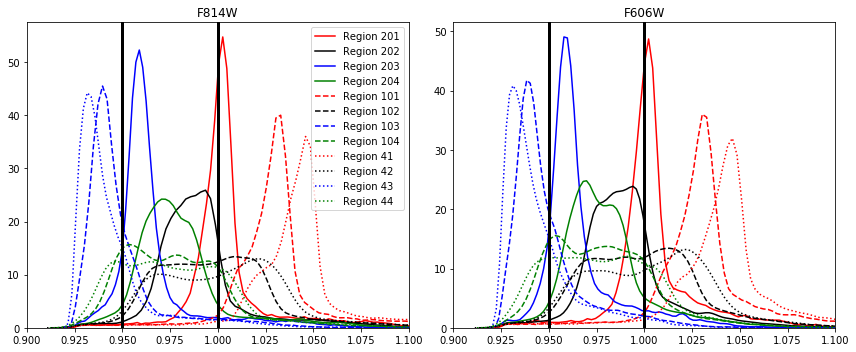

In [46]:
axes = plot_exposures('../data/M87/reduced/M87_F814W_drc.fits', '../data/M87/reduced/M87_F606W_drc.fits',
                      ppy.instrument.default_m87_filters(), regions=[201,202,203,204,101,102,103,104,41,42,43,44]);

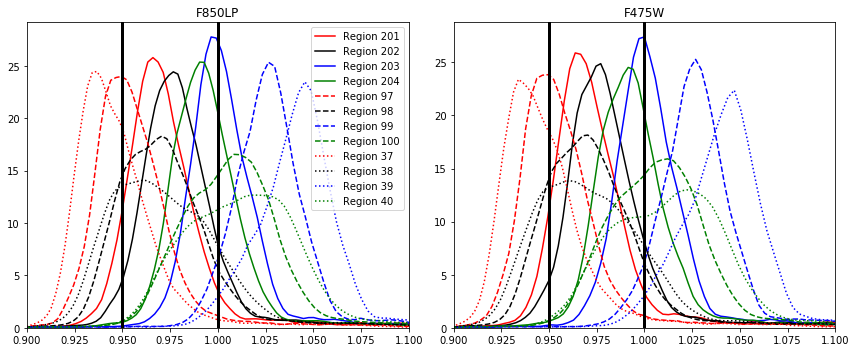

In [47]:
axes = plot_exposures('../data/M49/reduced/M49_F850LP_drc.fits', '../data/M49/reduced/M49_F475W_drc.fits',
                      ppy.instrument.default_m49_filters(), regions=[201,202,203,204,97,98,99,100,37,38,39,40]);

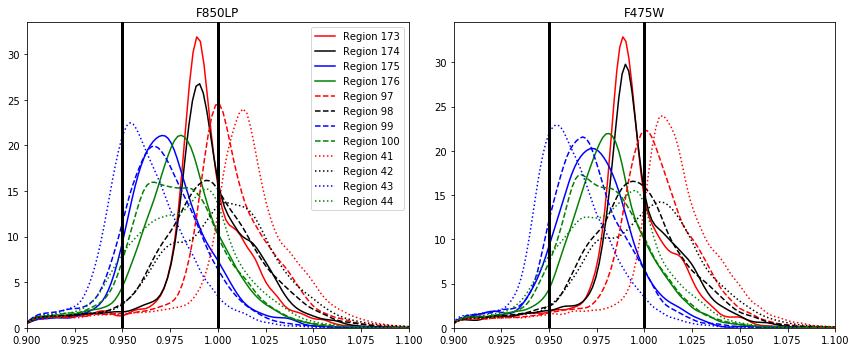

In [48]:
axes = plot_exposures('../data/NGC3377/reduced/NGC3377_F850LP_drc.fits', '../data/NGC3377/reduced/NGC3377_F475W_drc.fits',
                      ppy.instrument.default_ngc3377_filters(), regions=[173,174,175,176,97,98,99,100,41,42,43,44]);

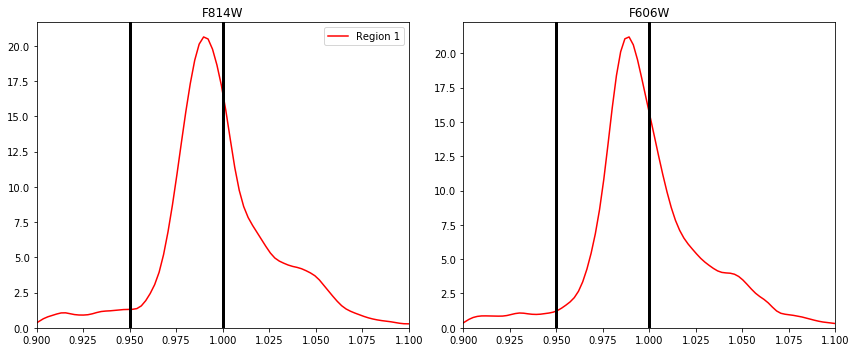

In [49]:
axes = plot_exposures('../data/DF2/reduced/DF2_F814W_drc.fits', '../data/DF2/reduced/DF2_F606W_drc.fits',
                      ppy.instrument.default_df2_filters(), regions=[1]);

In [15]:
mags2 = f.counts_to_mag(flux*f._exposure / exp, mag_system='vega')

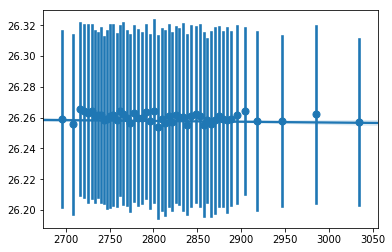

In [21]:
kw = {'x_estimator': np.median,
              'x_bins': 50,
             'x_ci': 'sd'}
sns.regplot(exp, mags1, **kw)

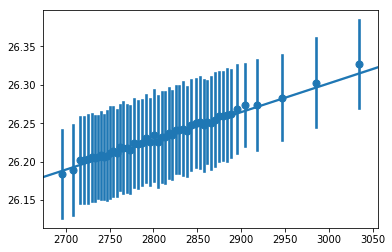

In [22]:
kw = {'x_estimator': np.median,
              'x_bins': 50,
             'x_ci': 'sd'}
sns.regplot(exp, mags2, **kw)

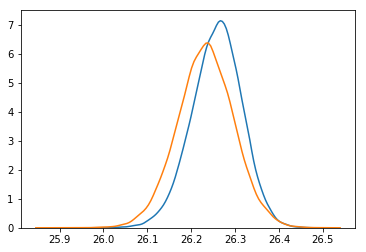

In [16]:
sns.kdeplot(mags1)
sns.kdeplot(mags2)

In [33]:
hdu = fits.open('../data/DF2/reduced/DF2_F814W_drc.fits')

In [34]:
mask = (hdu['REGIONS'].data == 1)
flux = hdu['SCI'].data[mask]
exp = hdu['WHT'].data[mask]

In [35]:
f = ppy.instrument.default_df2_filters()

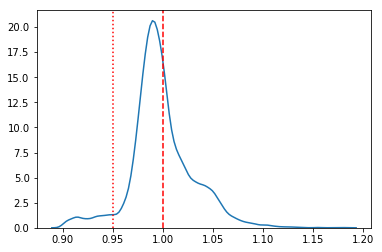

In [36]:
ax = sns.kdeplot(exp/f[0]._exposure)
ax.axvline(x=1.0, ls='--', color='r')
ax.axvline(x=0.95, ls=':', color='r')


In [ ]:
sns.kdeplot